In [1]:
from gidnet.qubitreuse import GidNET

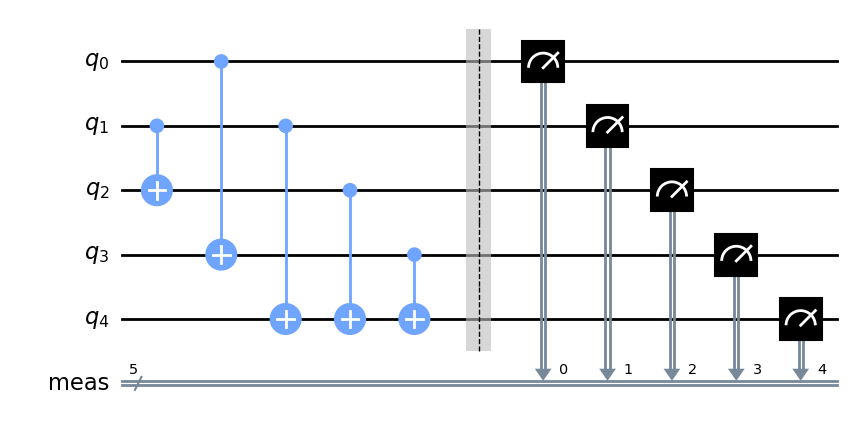

In [2]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(5)

circ.cx(1,2)
circ.cx(0,3)

circ.cx(1,4)
circ.cx(2,4)
circ.cx(3,4)


circ.measure_all()

circ.draw('mpl')

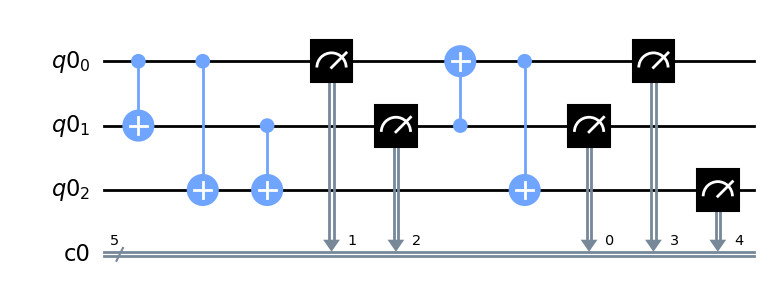

In [3]:
gidnet = GidNET(circ)
gidnet.compile_to_dynamic_circuit(draw=True)

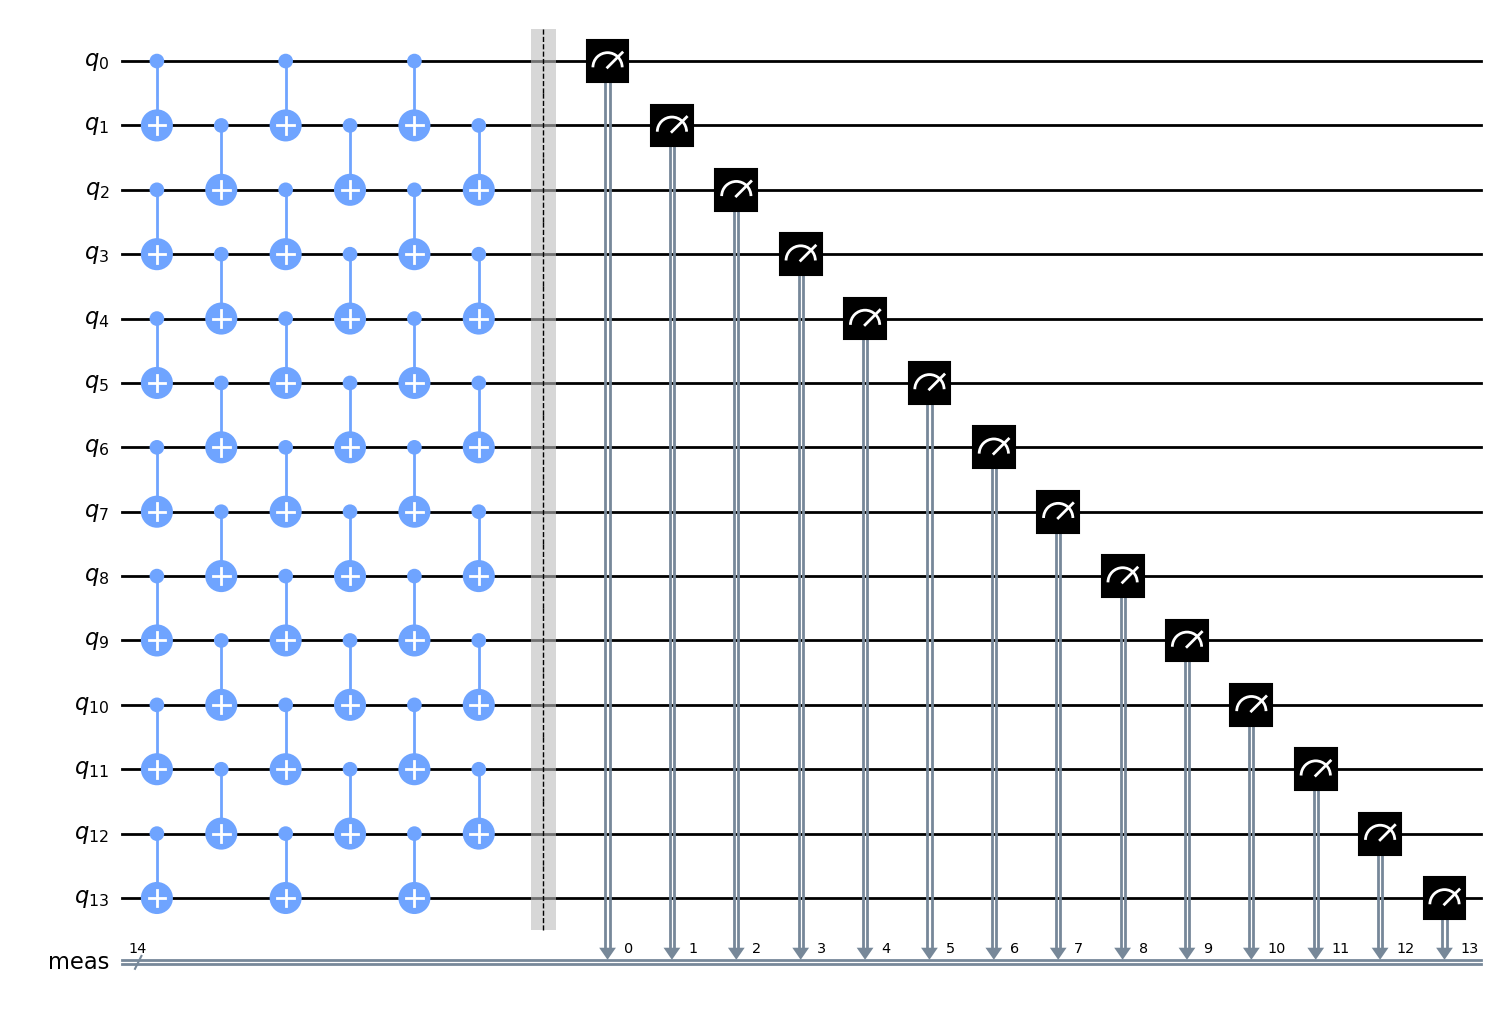

In [4]:
num_qubits = 14
k = 3
brick_circ = QuantumCircuit(num_qubits)

for i in range(k):
    for q in range(int(num_qubits/2)):
        brick_circ.cx(2*q, 2*q+1)
        
    for q in range(int(num_qubits/2)-1):
        brick_circ.cx(2*q+1, 2*q+2)
        
    # circ.barrier()

brick_circ.measure_all()

brick_circ.draw('mpl', fold=1)


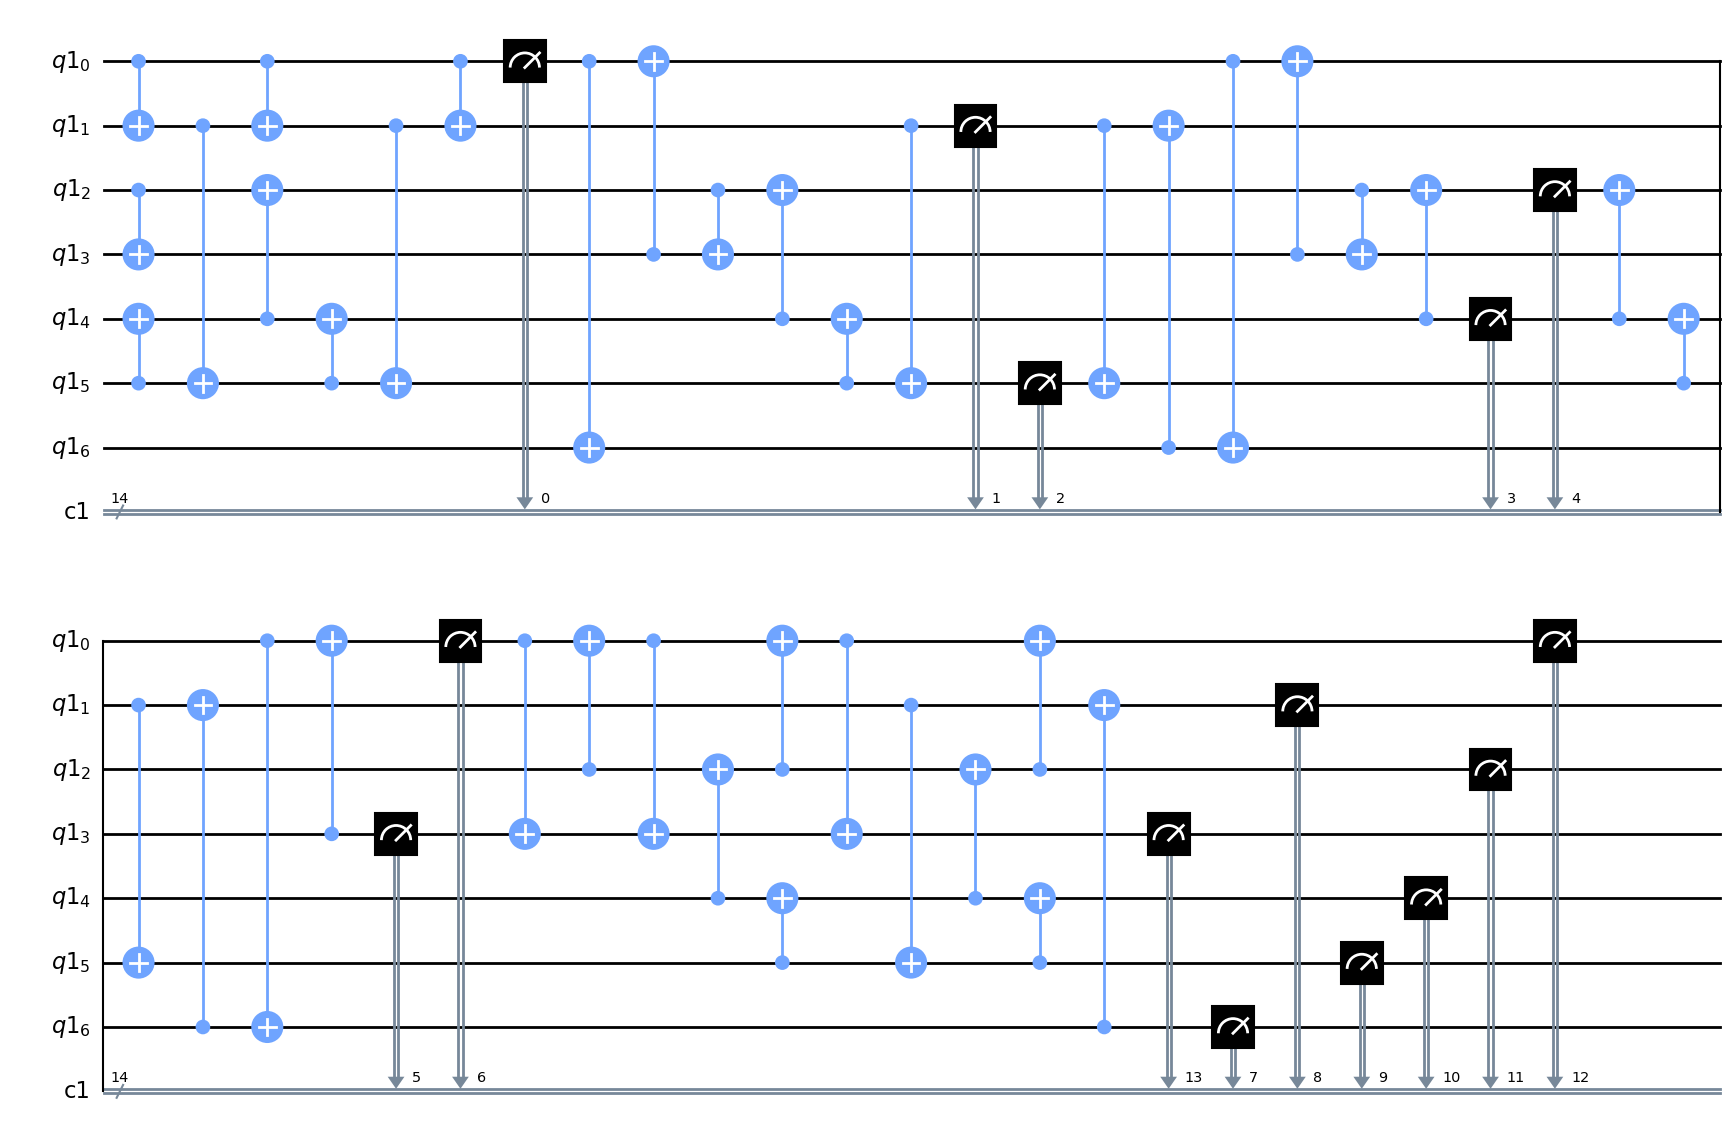

In [5]:
gidnet = GidNET(brick_circ)
gidnet.compile_to_dynamic_circuit(draw=True)